In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="outer")

# Display the data table for preview
data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_tumor = data.groupby(['Drug','Timepoint'])

# Convert to DataFram
mean_tumor_volume_df = pd.DataFrame(grouped_tumor["Tumor Volume (mm3)"].mean()).reset_index()

# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame
error_tumor_volume_df = pd.DataFrame(grouped_tumor["Tumor Volume (mm3)"].sem()).reset_index()
# Preview DataFrame
error_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
error_tumor_volume_formatted = error_tumor_volume_df.pivot('Timepoint',columns="Drug",values="Tumor Volume (mm3)")
mean_tumor_volume_formatted = mean_tumor_volume_df.pivot('Timepoint',columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked
mean_tumor_volume_formatted

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


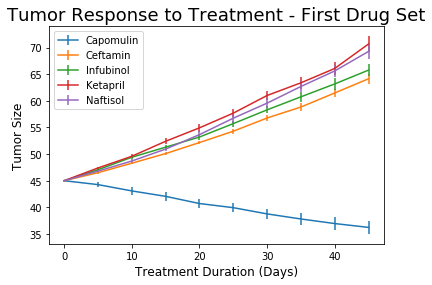

In [5]:
x_axis = np.arange(0,46,5)
Capomulin = plt.errorbar(x_axis,mean_tumor_volume_formatted["Capomulin"],yerr=error_tumor_volume_formatted["Capomulin"],
                          label="Capomulin")

Ceftamin = plt.errorbar(x_axis,mean_tumor_volume_formatted["Ceftamin"],yerr=error_tumor_volume_formatted["Ceftamin"],
                       label="Ceftamin")

Infubinol = plt.errorbar(x_axis,mean_tumor_volume_formatted["Infubinol"],yerr=error_tumor_volume_formatted["Infubinol"],
                        label="Infubinol")

Ketapril = plt.errorbar(x_axis,mean_tumor_volume_formatted["Ketapril"],yerr=error_tumor_volume_formatted["Ketapril"],
                       label="Ketapril")

Naftisol = plt.errorbar(x_axis,mean_tumor_volume_formatted["Naftisol"],yerr=error_tumor_volume_formatted["Naftisol"],
                       label="Naftisol")

plt.legend()
plt.title("Tumor Response to Treatment - First Drug Set", fontsize=18)
plt.ylabel("Tumor Size", fontsize=12)
plt.xlabel("Treatment Duration (Days)", fontsize=12)

plt.savefig("Images/Tumor_Response_1st_Drug_Set")

plt.show()

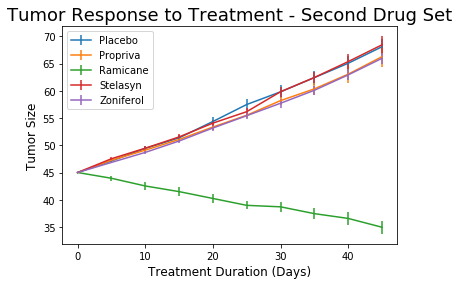

In [8]:
Placebo = plt.errorbar(x_axis,mean_tumor_volume_formatted["Placebo"],yerr=error_tumor_volume_formatted["Placebo"],
                      label="Placebo")

Propriva = plt.errorbar(x_axis,mean_tumor_volume_formatted["Propriva"],yerr=error_tumor_volume_formatted["Propriva"],
                       label="Propriva")

Ramicane = plt.errorbar(x_axis,mean_tumor_volume_formatted["Ramicane"],yerr=error_tumor_volume_formatted["Ramicane"],
                       label="Ramicane")

Stelasyn = plt.errorbar(x_axis,mean_tumor_volume_formatted["Stelasyn"],yerr=error_tumor_volume_formatted["Stelasyn"],
                       label="Stelasyn")

Zoniferol = plt.errorbar(x_axis,mean_tumor_volume_formatted["Zoniferol"],yerr=error_tumor_volume_formatted["Zoniferol"],
                        label="Zoniferol")

plt.legend()
plt.title("Tumor Response to Treatment - Second Drug Set", fontsize=18)
plt.ylabel("Tumor Size", fontsize=12)
plt.xlabel("Treatment Duration (Days)", fontsize=12)

plt.savefig("Images/Tumor_Response_2nd_Drug_Set")

plt.show()

In [9]:
# Through these two graphs, we can visualize that the only medicaitons effective at shrinking tumor sizes are Capomulin and 
# Ramicane. We can also see that the trends are significant by looking at the error bars.

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_metastic_sites_df = pd.DataFrame(grouped_tumor["Metastatic Sites"].mean()).reset_index()

# Preview DataFrame
mean_metastic_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
error_metastic_sites_df = pd.DataFrame(grouped_tumor["Metastatic Sites"].sem()).reset_index()

# Preview DataFrame
error_metastic_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
# Minor Data Munging to Re-Format the Data Frames
error_metastic_sites_formatted = error_metastic_sites_df.pivot('Timepoint',columns="Drug",values="Metastatic Sites")
mean_metastic_sites_formatted = mean_metastic_sites_df.pivot('Timepoint',columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked
mean_metastic_sites_formatted

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


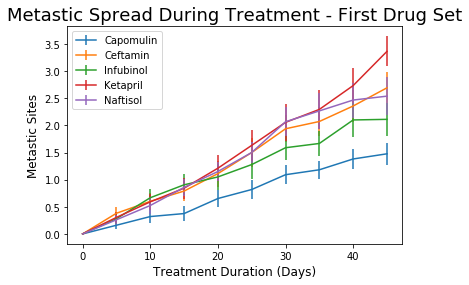

In [13]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,46,5)
Capomulin = plt.errorbar(x_axis,mean_metastic_sites_formatted["Capomulin"],yerr=error_metastic_sites_formatted["Capomulin"],
                          label="Capomulin")

Ceftamin = plt.errorbar(x_axis,mean_metastic_sites_formatted["Ceftamin"],yerr=error_metastic_sites_formatted["Ceftamin"],
                       label="Ceftamin")

Infubinol = plt.errorbar(x_axis,mean_metastic_sites_formatted["Infubinol"],yerr=error_metastic_sites_formatted["Infubinol"],
                        label="Infubinol")

Ketapril = plt.errorbar(x_axis,mean_metastic_sites_formatted["Ketapril"],yerr=error_metastic_sites_formatted["Ketapril"],
                       label="Ketapril")

Naftisol = plt.errorbar(x_axis,mean_metastic_sites_formatted["Naftisol"],yerr=error_metastic_sites_formatted["Naftisol"],
                       label="Naftisol")

plt.legend()
plt.title("Metastic Spread During Treatment - First Drug Set", fontsize=18)
plt.ylabel("Metastic Sites", fontsize=12)
plt.xlabel("Treatment Duration (Days)", fontsize=12)

# Save the Figure
plt.savefig("Images/Metastic_Spread_1st_Drug_Set")

# Show the Figure
plt.show()

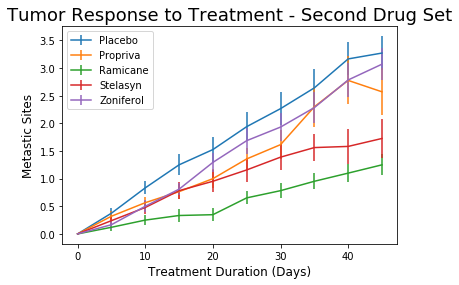

In [14]:
x_axis = np.arange(0,46,5)
Placebo = plt.errorbar(x_axis,mean_metastic_sites_formatted["Placebo"],yerr=error_metastic_sites_formatted["Placebo"],
                      label="Placebo")

Propriva = plt.errorbar(x_axis,mean_metastic_sites_formatted["Propriva"],yerr=error_metastic_sites_formatted["Propriva"],
                       label="Propriva")

Ramicane = plt.errorbar(x_axis,mean_metastic_sites_formatted["Ramicane"],yerr=error_metastic_sites_formatted["Ramicane"],
                       label="Ramicane")

Stelasyn = plt.errorbar(x_axis,mean_metastic_sites_formatted["Stelasyn"],yerr=error_metastic_sites_formatted["Stelasyn"],
                       label="Stelasyn")

Zoniferol = plt.errorbar(x_axis,mean_metastic_sites_formatted["Zoniferol"],yerr=error_metastic_sites_formatted["Zoniferol"],
                        label="Zoniferol")

plt.legend()
plt.title("Tumor Response to Treatment - Second Drug Set", fontsize=18)
plt.ylabel("Metastic Sites", fontsize=12)
plt.xlabel("Treatment Duration (Days)", fontsize=12)

plt.savefig("Images/Metastic_Spread_2nd_Drug_Set")

plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

In [15]:
# Metastatic Sites are areas of the body where new cancer cells are detected. We can see through these graphs that there is no 
# medication in this study which whill actually halt the spread of cancer. We do however see that the two medications that were 
# most effective in shrinking tumors are also the most likely to stop the spread of cancer cells. It is also worth noting that 
# the error bars appear to be smalle for these medicaitons. This indicates a higher efficacy of taking these drugs as opposed to
# taking the others.

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_mouse_count = data.groupby(['Drug','Timepoint'])

# Convert to DataFrame
mouse_count_df = pd.DataFrame(grouped_mouse_count["Mouse ID"].count()).reset_index()

# Preview DataFrame
mouse_count_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_by_time = mouse_count_df.pivot("Timepoint",columns="Drug",values="Mouse ID")

# Preview the Data Frame
mouse_count_by_time.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [18]:
#convert DF to percentages
mouse_count_by_time = mouse_count_by_time.divide(25)*100

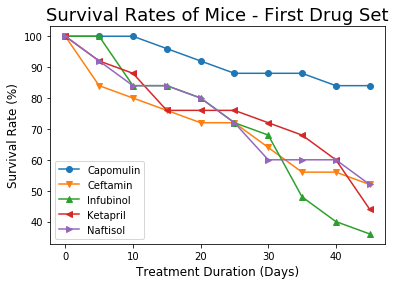

In [19]:
# Generate the Plot (Accounting for percentages)
x_axis = np.arange(0,46,5)
Capomulin = plt.plot(x_axis,mouse_count_by_time["Capomulin"],label="Capomulin",marker='o')

Ceftamin = plt.plot(x_axis,mouse_count_by_time["Ceftamin"],label="Ceftamin",marker='v')

Infubinol = plt.plot(x_axis,mouse_count_by_time["Infubinol"],label="Infubinol",marker='^')

Ketapril = plt.plot(x_axis,mouse_count_by_time["Ketapril"],label="Ketapril",marker='<')

Naftisol = plt.plot(x_axis,mouse_count_by_time["Naftisol"],label="Naftisol",marker='>')

plt.legend()
plt.title("Survival Rates of Mice - First Drug Set", fontsize=18)
plt.ylabel("Survival Rate (%)", fontsize=12)
plt.xlabel("Treatment Duration (Days)", fontsize=12)

# Save the Figure
plt.savefig("Images/Survival_Rate_1st_Drug_Set")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

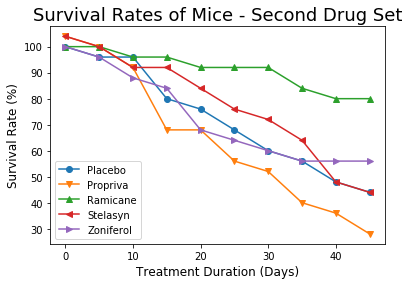

In [20]:
x_axis = np.arange(0,46,5)
Placebo = plt.plot(x_axis,mouse_count_by_time["Placebo"],label="Placebo",marker='o')

Propriva = plt.plot(x_axis,mouse_count_by_time["Propriva"],label="Propriva",marker='v')

Ramicane = plt.plot(x_axis,mouse_count_by_time["Ramicane"],label="Ramicane",marker='^')

Stelasyn = plt.plot(x_axis,mouse_count_by_time["Stelasyn"],label="Stelasyn",marker='<')

Zoniferol = plt.plot(x_axis,mouse_count_by_time["Zoniferol"],label="Zoniferol",marker='>')

plt.legend()
plt.title("Survival Rates of Mice - Second Drug Set", fontsize=18)
plt.ylabel("Survival Rate (%)", fontsize=12)
plt.xlabel("Treatment Duration (Days)", fontsize=12)

# Save the Figure
plt.savefig("Images/Survival_Rate_2nd_Drug_Set")

plt.show()

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
percent_change = (-(mean_tumor_volume_formatted.iloc[[0]].values[0] - mean_tumor_volume_formatted.iloc[[9]].values[0])/45)*100

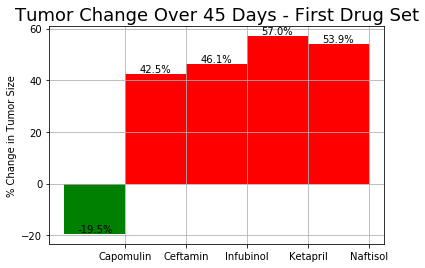

In [22]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs
pass_fail = []
for drug in percent_change:
    if drug < 0:
        pass_fail.append("g")
    else:
        pass_fail.append("r")

summary = {"Drug":mean_tumor_volume_formatted.columns.values,
           "Percent Change":percent_change,
           "Pass Color":pass_fail}
summary = pd.DataFrame(summary)
first_set = summary.iloc[[0,1,2,3,4],:]
second_set = summary.iloc[[5,6,7,8,9],:]

# Orient widths. Add labels, tick marks, etc. 
fig = plt.figure()
ax = fig.add_subplot()

ax.bar(first_set["Drug"],first_set["Percent Change"], color = first_set["Pass Color"],width = -1, align="edge")
plt.grid()
plt.yticks(np.arange(-20,61,20))
plt.title("Tumor Change Over 45 Days - First Drug Set", fontsize=18)
plt.ylabel("% Change in Tumor Size")

# Use functions to label the percentages of changes
# Call functions to implement the function calls

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    label = "{:.1f}%".format(y_value)

        # Create annotation
    ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, 0),          
            textcoords="offset points", 
            ha='center',                
            va='bottom')        

# Save the Figure
plt.savefig("Images/Summary_1st_Drug_Set")

# Show the Figure
plt.show()

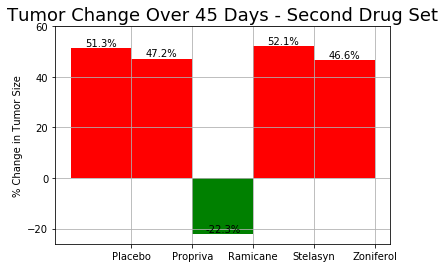

In [23]:
fig = plt.figure()
ax = fig.add_subplot()

ax.bar(second_set["Drug"],second_set["Percent Change"], color = second_set["Pass Color"],width = -1, align="edge")
plt.grid()
plt.yticks(np.arange(-20,61,20))
plt.title("Tumor Change Over 45 Days - Second Drug Set", fontsize=18)
plt.ylabel("% Change in Tumor Size")

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    label = "{:.1f}%".format(y_value)

        # Create annotation
    ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, 0),          
            textcoords="offset points", 
            ha='center',                
            va='bottom')        
    
plt.savefig("Images/Summary_2nd_Drug_Set")

plt.show()